In [1]:
# pycharmでjupyter notebookを使う方法
# https://blog.jetbrains.com/ja/2019/11/30/2396/

import pandas as pd
import matplotlib.pyplot as plt
# ダークモードの場合、設定しないとメモリが見えなくなる
plt.style.use('dark_background')

import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
from scipy.stats import poisson,binom
import math


In [2]:
# https://github.com/aviatesk/intro-statistical-modeling/edit/master/data/data6a.csv
df = pd.read_csv('../data/data6a.csv')
df.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [3]:
# N: 観察種子数
# y: 生存種子数
# x: 植物のサイズ
# f: C:肥料なし, T: 肥料あり(施肥[せひ]というらしい)

df.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [4]:
# カテゴリが何件入っているか見る
df["f"].value_counts()

C    50
T    50
Name: f, dtype: int64

In [5]:
# 型確認
df.dtypes

N      int64
y      int64
x    float64
f     object
dtype: object

<AxesSubplot:xlabel='x', ylabel='y'>

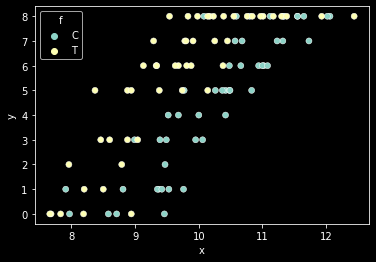

In [6]:

# 散布図
# https://engineeeer.com/pandas-dataframe-scatterplot/
sns.scatterplot(x='x', y='y', hue='f', data=df)

上の散布図をみると、
- 体サイズ$x_i$が大きくなると、生存種子数$y_i$が多くなるらしい
- 肥料を与えると生存種子数$y_i$が多くなるらしい

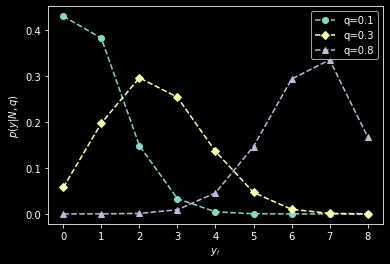

In [7]:
# 二項分布
# N個の中から$$y_i個とって、生存確率がqの割合？

y = np.arange(0, 9)
plt.plot(pd.Series(binom.pmf(y, 8, 0.1), index=y), 'o--', label='q=0.1')
plt.plot(pd.Series(binom.pmf(y, 8, 0.3), index=y), 'D--', label='q=0.3')
plt.plot(pd.Series(binom.pmf(y, 8, 0.8), index=y), '^--', label='q=0.8')
plt.legend(loc='upper right')
plt.xlabel('$y_{i}$')
plt.ylabel('$p (y | N, q)$')
plt.show()

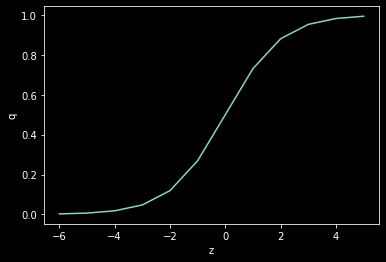

In [8]:
# ロジスティック曲線
z_list = np.arange(-6, 6)
q_list = list(map(lambda z: 1 / (1+math.exp(-z)), z_list))
plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

$z_i$は線型予測子$z_i=\beta_1+\beta_2 x_i + ...$

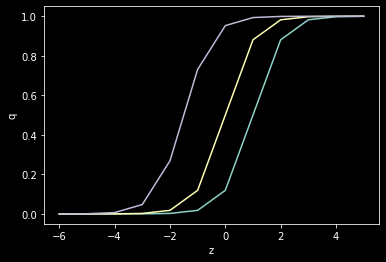

In [9]:
# beta2 = 2でbeta1が2, 0, -3の時
beta2 = 2
beta1_list = [2, 0, -3]
z_list = np.arange(-6, 6)
for beta1 in beta1_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

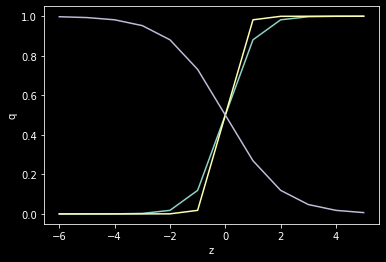

In [10]:
# beta1=0でbeta2が2,4,-1の時
beta1 = 0
beta2_list = [2,4,-1]
z_list = np.arange(-6, 6)
for beta2 in beta2_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

生存確率$q_i$が体サイズ$x_i$にだけ依存していると仮定すると線型予測子は$z_i=\beta_1+\beta_2x_i$になる。
この時の$q_i$と$x_i$の関係がパラメータ$\beta_1,\beta_2$に依存している様子を上記グラフ達が示している。

ロジスティック関数の

$q_i=\frac{1}{1+exp(-z_i)}$

を変形すると

$log\frac{q_i}{1-q_i} = z_i$

となる。この左辺のことをロジット関数(logit function)という

$logit(q_i) = log \frac{q_i}{1-q_i}$

ロジット関数はロジスティック関数の逆関数であり、ロジスティック関数の逆関数がロジット関数。

## 6.4.2 パラメータ推定

当てはまりの良さを表す尤度関数

$L(\{\beta_j\})=\Pi_i\begin{pmatrix} N_i \\ y_i \end{pmatrix}q^{y_i}_i(1-q_i)^{N_i- y_i}$

から、対数尤度関数

$logL(\{\beta_j\})=\sum_i\{log \begin{pmatrix} N_i \\ y_i \end{pmatrix}+y_i log(q_i) + (N_i - y_i) log(1-q_i)\}$

が得られる(どうしてこれが出てくるのかはわからない。。。

上記logLを最大にする推定値のセット

$\{\hat{\beta}_j\}$

を探し出すのが最尤推定。
ここでの確率$q_i$は$\{\beta_1, \beta_2, \beta_3\}$の関数であることに注意

<AxesSubplot:xlabel='x', ylabel='y'>

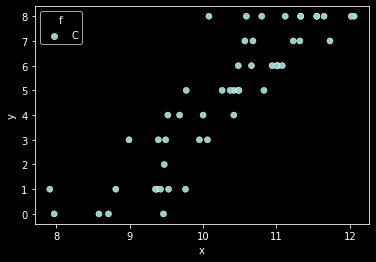

In [11]:
not_sehi_df = df[df['f'] == 'C']
sns.scatterplot(x='x', y='y', hue='f', data=not_sehi_df)

# 確率分布と線グラフの方は表示の方法分からないので割愛

In [12]:
import statsmodels.api as sm

# こういう書き方でできるらしい。general line modelが必要になったら調べるか・・・
fit = smf.glm(formula='y + I(N - y) ~ x + f', data=df, family=sm.families.Binomial())
res_fit = fit.fit()
# interceptが-19, x=1.9, fTが2.02
print(res_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Mon, 04 Jan 2021   Deviance:                       123.03
Time:                        17:19:56   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.0

$\{\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}\}=\{-19.5, 1.95, 2.02\}$となった。

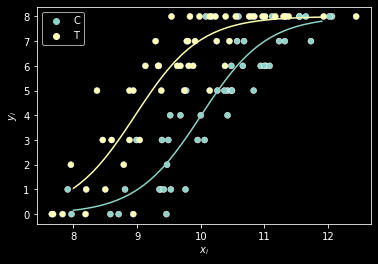

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = res_fit.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = res_fit.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()

## 6.4.3 ロジットリンク関数の意味・解釈
ロジスティック関数の逆関数であるロジット関数は

$logit(q_i) = log \frac{q_i}{1-q_i}$

であり、これが線型予測子に等しいので

$log \frac{q_i}{1-q_i} = $ 線型予測子

$\frac{q_i}{1-q_i} = $ exp(線型予測子)

$\frac{q_i}{1-q_i} = exp(\beta_1 + \beta_2 x_i + \beta_3 f_i)$

$\frac{q_i}{1-q_i} = exp(\beta_1)*exp(\beta_2 x_i) * exp(\beta_3 f_i)$

となる。左辺の

$\frac{q_i}{1-q_i}$

はオッズ(odds)と呼ばれる量。(生存する確率) / (生存しない確率) という比率であり、
$q_i = 0.5$ の時は$\frac{0.5}{1-0.5}=1$なのでオッズは1倍,
$q_i = 0.8$ の時は$\frac{0.8}{1-0.8}=4$なのでオッズが4倍であると言ったりします。

`res_fit.summary()`にあった値から$\hat{\beta_1}$を省略し、$\{\hat{\beta_2},\hat{\beta_3}\}$を代入すると

$\frac{q_i}{1-q_i} \propto exp(1.95x_i)* exp(2.02 f_i)$

(∝は比例を表すから、比例を表すなら$\hat{\beta_1}$を省略した？

生存確率のオッズに対する植物個体の体サイズの影響を調べると、個体iの大きさが1単位増大した場合は

$\frac{q_i}{1-q_i} \propto exp(1.95 * (x_i + 1)) * exp(2.02 f_i)$

$\frac{q_i}{1-q_i} \propto exp(1.95 x_i) * exp(1.95) * exp(2.02 f_i)$

のように書ける。

In [14]:
print(math.exp(1.95))
print(math.exp(2.02))

7.028687580589293
7.538324933661922


7倍ぐらい増加する。同様に施肥処理あり($f_i$=1)だとexp(2.02)なので7.5倍増える。
このようにロジットリンク関数で生存確率を定義することによって、様々な要因と応答事象のオッズの解釈が簡単になる。

ロジスティック関数の利点は

- 生存確率が$0 \leq q_i \leq 1$となる
- 上記のように要因と応答事象のオッズの解釈ができる

オッズの対数を取ると

$log \frac{q_i}{1-q_i} = \beta_1 + \beta_2 x_i + \beta_3 f_i$

となる。右辺の$\beta_1 + \beta_2 x_i + \beta_3 f_i$は線型予測子$z_i$そのもの

「生活習慣Xによってなんとかビョウの発病リスクが7倍になります」などの「リスク」とはオッズ比のこと。

個人iの生活習慣Xの効果を表す係数が$\beta_s$deあるとして、発病確率を理事スティック回帰で調べたら$\hat{\beta_s} = 1.95$だったとする。
この場合

$\frac{Xのodds}{非Xのodds} = \frac{exp(X・非Xの共通部分) * exp(1.95 * 1)}{exp(X・非Xの共通部分) * exp(1.95 * 0)} = exp 1.95$

となる。よって病気になるオッズ比はexp1.95(=7倍)ぐらいと見積もれる

## 6.4.4 ロジスティック回帰のモデル選択

6.4.2項で作成したサイズ$x_i$と施肥処理$f_i$を説明変数に使ったロジスティック回帰の統計モデルが種子の生存数をもっともよく予測するモデルなのかは不明。

- 説明変数どちらか一方だけを使ったモデル
- どちらも使わないモデル

のほうが良い予測を得られるかもしれない。そこで、AICでモデル比較をする。

(ロジスティックだと0 or 1しか予測できないきがするので、現行のyでは予測できないのでは・・・？だからyを0-1の範囲にして線形で表現すべきなのか？)

In [15]:
# https://ohke.hateblo.jp/entry/2018/02/12/230000

# この記法が何を表しているのかが不明・・・

formulas = [
    'y + I(N - y) ~ 1',
    'y + I(N - y) ~ x',
    'y + I(N - y) ~ f',
    'y + I(N - y) ~ x + f'
]
results = []

for formula in formulas:
    results.append(smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit(disp=0))

# 比較するとx+fがよかったらしい
for i in range(4):
    print(formulas[i], ':', results[i].aic)



y + I(N - y) ~ 1 : 644.4093416623778
y + I(N - y) ~ x : 364.345443283716
y + I(N - y) ~ f : 637.7597534566678
y + I(N - y) ~ x + f : 272.2111292852233


## 6.5 交互作用項の入った線型予測子

線型予測子$\beta_1 + \beta_2 x_i + \beta_3 f_i$をさらに複雑化して交互作用(interaction)項を追加する。

この例題の交互作用とは植物の体サイズ$x_i$と施肥効果$f_i$の「積」の効果。

交互作用項を入れた線型予測子は$logit(q_i)=\beta_1 + \beta_2 x_i + \beta_3 f_i + \beta_4 x_i f_i$となる。

交互作用項$\beta_4 x_i f_i$は単純に「$x_i$と$f_i$の積に係数$\beta_4$を掛けた物」。交互作用が大きく影響を持つ場合、
平均生存種子数のサイズ$x_i$の依存性は施肥処理$f_i$によって大きく変わる


In [16]:
result = smf.glm(formula='y + I(N - y) ~ x + f + x:f', data=df, family=sm.families.Binomial()).fit()

print(result.summary())
print(result.aic)


                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Mon, 04 Jan 2021   Deviance:                       122.43
Time:                        17:19:57   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.0

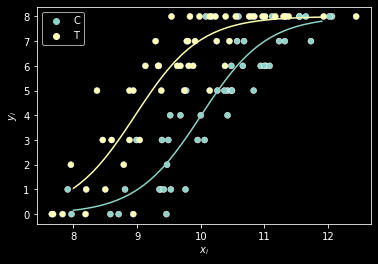

In [17]:
# 交差作用のないモデル
fit = smf.glm(formula='y + I(N - y) ~ x + f', data=df, family=sm.families.Binomial())
res_fit = fit.fit()
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = res_fit.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = res_fit.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()



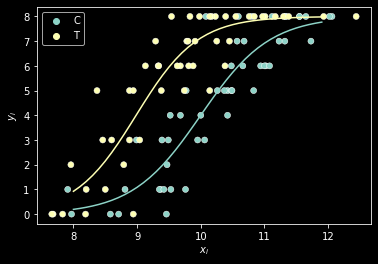

In [18]:
# 交差作用のあるモデル
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = result.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = result.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()

上記を見ると、$f_i$(f[T.T])のcoef(係数)である$\beta_3$が-0.06ととても小さい。
また、aicはx+fよりほんの少し悪化している。

施肥処理をしなかった場合は

$logit(q_i) = -18.5 + 1.85x_i$

で、施肥処理をした場合は

$logit(q_i) = -18.5 - 0.06  + (1.85 + 0.216) * x_i = -18.6 + 2.07x_i$

となる。

交互作用項を追加しても上記グラフのようにほぼ変わらない。予測能力は何も改善されなかったと結論できる。
交互作用項を使うときに注意すべきは「無闇に交互作用項を入れない」ということ。説明変数が多い場合には交互作用項の個数が
組み合わせ論的爆発で増加してパラメータ推定が困難になる。

# 6.6 割り算値の統計モデリングはやめよう

二項分布とロジットリンク関数を使ったロジスティック回帰を使う利点

- 「種子が生存している確率」「処理に応答する確率」といった何かの生起確率を推定するときに(観測データ)/(観測データ)といった割り算値を作り出す必要がなくなる。

例題のような種子の生存確率が何に依存しているのかを知りたいと言ったときに観測値どうしの割り算をしてしまいがち。
他に指標を創作する例:

- 観測値の対数変換
- 複数の観測値を一つの平均値に直す

変形した観測値を統計モデルの応答変数にするのは不必要であるばかりでなく、場合によって間違った結果を導きかねない。
生じる問題例

- 情報が失われる

野球の打率で1000打数300安打と10打数3安打の打者は同じ程度に確からしい「3割打者」？

- 変換された値の分布はどうなる？

分子・分母にそれぞれ誤差が入った数量どうしを割り算して作られた割り算値はどんな確率分布に従うのでしょうか？
カウントデータに1加えて対数変換すればそれは正規分布になるのでしょうか？
(これはよくやる・・・ダメだったのか？


# 6.6.1 割算値いらずのオフセット項わざ

データ解析において観測値の割り算や変数変換によって数値を作成、それを統計モデルの応答変数として使用しなければならない状況はほとんどない。
(作図で使う時はある。ただしパラメータ推定で割算値を使う必要は無い
それより理解しやすい統計モデリングの方法が必ずある。

ロジスティック回帰の統計モデルのように「N個のうちy個で事象が生じる確率」を明示的に扱う二項分布を使うことで割り算値の使用は回避できる。
(これはy/Nの割算値ではないのか・・・？
https://shuyo.hatenablog.com/entry/20140730/glm

便利な方法として「オフセット項わざ」というのがある。

架空データでの説明

- 調査地100箇所($i \in \{1,2,..,100\})$
- iごとに面積$A_i$が異なる
- iの明るさ$x_i$を測っている
- iにおける植物個体数$y_i$を記録
- 目的: iにおける植物個体の「人口密度(個体数/面積)」が「明るさ」$x_i$にどう影響されているか知りたい

人口密度をあつからかと言って観測値$y_i, A_i$で割算値をこしらえる必要はない。GLMのオフセット高を利用して解決が可能

面積が$A_i$である調査地iにおける人口密度は

$\frac{平均個体数\lambda_i}{A_i} = 人口密度$

となる。人口密度は生の量なので、指数関数と明るさ$x_i$依存性を組み合わせて

$\lambda_i = A_i * 人口密度 = A_i exp(\beta_1 + \beta_2 x_i)$

とモデル化し、変形すると

$\lambda_i = exp(\beta_1 + \beta_2 x_i + log(A_i))$

となり、$z_i = \beta_1 + \beta_2 x_i + log A_i$を線型予測子とする対数リンク関数・ポアソン分布のGLMになる。
ただし$z_i$の中のlogA_iには係数(\beta_Xのようなパラメータ)がついていない。
このように線型予測子の中でパラメータがつかないlog A_iのような項をオフセット項と呼ぶ。

線型予測子にlogA_iという「げた」を履かせていると考えれば良いらしい
(広告のCTR予測したいときにcostをげた履かせるとか使えそう


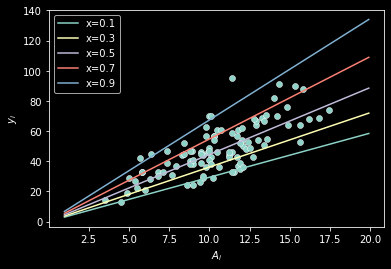

In [19]:
# https://github.com/aviatesk/intro-statistical-modeling/blob/master/data/data6b.csv

data6b = pd.read_csv('../data/data6b.csv')
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='A', y='y', data=data6b)
ax.set_xlabel('$A_{i}$')
ax.set_ylabel('$y_{i}$')
# offsetは下記のように書く https://ohke.hateblo.jp/entry/2018/02/12/230000
result = smf.glm(formula='y ~ x', offset=np.log(data6b['A']), data=data6b, family=sm.families.Poisson()).fit()
# 面積
a_list = np.arange(1, 20, 0.1)
# 明るさxが0.1,0.3,0.5,0.7,0.9の時の平均個体数を予測
x_list = np.arange(0.1, 1, 0.2)
for x in x_list:
    data = pd.DataFrame({'A': a_list, 'x': x})
    value = result.predict(exog = data)
    # valueには人口密度が入っているので、面積で掛け算してグラフに描画する必要があるため掛けている
    combine = [x_zip * y_zip for (x_zip, y_zip) in zip(a_list, value)]
    ax.plot(a_list, combine, label='x={:.1f}'.format(x))
    ax.legend()
plt.show()

オフセット項はGLM(とそれを発展させた統計モデル)で色々と応用できるわざ。単位面積当たりだけでなく、単位時間当たりの事象を調べたいときにも使える。
例えば調査地A,Bである時間に上空を通過した鳥の個体数をカウントし、調査地によって通過する鳥密度が異なるかどうかしら調べたいとする。
AとBでそれぞれ観察時間が異なっていたとしてもそれぞれの「観察時間の対数」をオフセット項にして、
通過した鳥の個体数を応答変数、調査地を因子型説明変数とすれば単位時間当たりの通過個体数の違いを推定できる。
他にも比率・密度などもオフセット項を使った統計モデリングが可能。

## 6.7 正規分布とその尤度

カウントデータを扱うポアソン分布や二項分布とは異なり、正規分布(normal distribution)は連続値のデータを統計モデルで扱うための確率分布。
正規分布=ガウス分布とも呼ばれる。

正規分布はポアソン分布と同じく平均値のパラメータ$\mu$をもち、$\pm \infty$の範囲で自由に変化できる。
ばらつきを表す標準偏差の$\sigma$でデータのばらつきも指定できる。

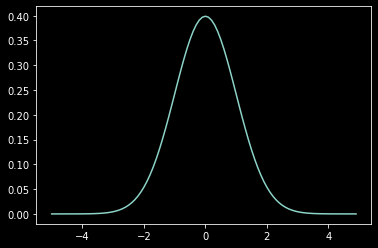

In [20]:
# https://lib-arts.hatenablog.com/entry/stats_scratch3
# μ(期待値)=0, σ(標準偏差)=1
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.arange(-5, 5, 0.1)
# Q. muとsigmaどこにも指定していないのにこのグラフができるのはなぜ？
# A. デフォが期待値loc=0, 標準偏差scale=1だから。
# http://kaisk.hatenadiary.com/entry/2015/02/17/192955
y = norm.pdf(x)
plt.plot(x,y)

plt.show()

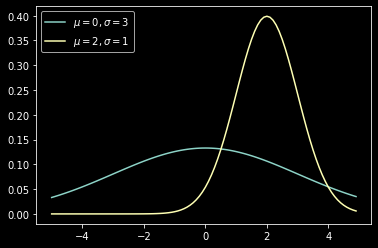

In [21]:
for (mu, sigma) in [(0, 3), (2, 1)]:
    y = norm.pdf(x=x, loc=mu, scale=sigma)
    plt.plot(x,y, label='$\mu={}, \sigma={}$'.format(mu, sigma))
    plt.legend()
plt.show()

平均パラメータ$\mu$と標準偏差パラメータ$\sigma$の正規分布の数式

$p(y|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\{-\frac{(y-\mu)^2}{2\sigma^2}\}$

これは正規分布の確率密度関数

$1.2 \leq y \leq 1.8$の確率は

$\int_{1.2}^{1.8}p(y|\mu,\sigma)dy$
と書くことができる。

In [22]:
# 下記のように求めることが可能
# https://ohke.hateblo.jp/entry/2018/02/12/230000
print(norm.cdf(1.8, 0, 1) - norm.cdf(1.2, 0, 1))


0.07913935110878245


$\Delta$は対角線集合らしい
https://ja.wikipedia.org/wiki/%E6%95%B0%E5%AD%A6%E8%A8%98%E5%8F%B7%E3%81%AE%E8%A1%A8

確率=確率密度関数 * $\Delta y$

という考え方に基づく、正規分布の最尤推定についての説明。

例:
N人からなる人間の集団の身長データを$Y=\{y_i\}$とする。個体iの身長が$y_i$。

ある$y_i$が$y_i - 0.5 \Delta y \leq y \leq 0.5 \Delta y$である確率は確率密度関数$p(y_i| \mu, \sigma)$と区間幅$\Delta y$の積で近似できる。

正規分布を使った統計モデルの尤度関数は

($\Pi$は直積集合)

https://ja.wikipedia.org/wiki/%E6%95%B0%E5%AD%A6%E8%A8%98%E5%8F%B7%E3%81%AE%E8%A1%A8

$L(\mu, \sigma) = \Pi_i p(y_i|\mu, \sigma) \Delta y = \Pi_i \frac{1}{\sqrt{2\pi\sigma^2}}exp\{-\frac{(y-\mu)^2}{2\sigma^2}\} \Delta y$

となり、対数尤度関数は以下のようになる(式変形がイマイチ不明・・・

$log L(\mu, \sigma) = -0.5N log(2\pi\sigma^2) - \frac{1}{2 \sigma^2}\sum_i(y_i-\mu)^2 + N log (\Delta y)$

しかし、正規分布など連続値の確率分布を使った統計モデルの最尤推定で区間幅$\Delta y$をいちいち設定する必要はない。
$\Delta y$は定数のため、パラメータ$\{\mu, \sigma\}$の最尤推定値に影響を与えない。
このため、尤度関数や対数尤度関数の表記では$\Delta y$や$log(\Delta y)$を無視して記述する。

$log L(\mu, \sigma) = -0.5N log(2\pi\sigma^2) - \frac{1}{2 \sigma^2}\sum_i(y_i-\mu)^2 $

連続確率分布の統計モデルの尤度は、データが得られる確率の積ではなく、確率密度の積になっている。
(データが得られる確率の積って？？)
尤度が確率密度の積である場合には対数尤度は負の値になるとは限らない。
そのため正規分布など連続値の確率分布を使った統計モデルでは対数尤度が正の値になったり、AICや逸脱度が負の値になったりすることがある。

$\sigma$が$\mu$とは無関係な定数だとすると、
二乗誤差の和$\sum_i(y_i-\mu)^2$ を最小にするようなパラメータ$\hat{\mu}$において$logL(\mu, \sigma)$が最大になる。
このことから標準偏差$\sigma$が一定である正規分布のパラメータの最尤推定が最小二乗法による推定と等しくなる。
(???)

## 6.8 ガンマ分布のGLM

(ガウス分布と紛らわしい・・・)
ガンマ分布(gamma distribution)は確率変数の取りうる範囲が0以上の連続確率分布。
確率密度関数は下記のように定義されている。

- s: shapeパラメータ
- r: rateパラメータ
- $\Gamma$: ガンマの大文字。ガンマ関数。

$p(y|s,r) = \frac{r^s}{\Gamma(s)} y^{s-1} exp(-ry)$

- 平均$s/r$
- 分散$s/r^2$


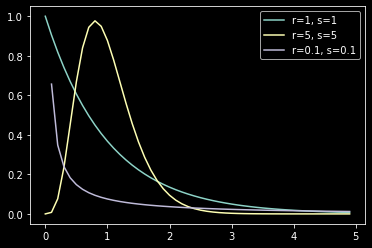

In [23]:
from scipy.stats import gamma

x = np.arange(0, 5, 0.1)
for (r, s) in [(1, 1), (5, 5), (0.1, 0.1)]:
    # scaleは1/rらしい
    y = gamma.pdf(x=x, a=r, scale=1/r)
    plt.plot(x,y, label='r={}, s={}'.format(r, s))
    plt.legend()
plt.show()

- x=葉重量
- y=平均花重量

がガンマ分布に従っていることとする。さらになんらかの生物学的な理由があって下記の式で仮定する。

$\mu_i = Ax^b_i$

右辺を$A=exp(a)$とおいてから全体を指数関数でまとめると

$\mu_i = exp(a)x^b_i = exp(a+b \space log \space x_i)$

対数をとると下記となる

$log \mu_i = a + blog x_i$

すると線型予測子$a+blogx_i$と対数リンク関数を使って平均$\mu_i$となる。
推定すべきパラメータは切片aと傾きb

In [ ]:
# https://github.com/aviatesk/intro-statistical-modeling/blob/master/data/data6c.csv
data6c = pd.read_csv('../data/data6c.csv')
# link関数の設定がわからない。うごかん
result = smf.glm(formula='y ~ x', data=data6c, family=sm.families.Gamma(link=sm.families.links.log)).fit()
x_list = np.arange(0, 1, 0.01)
y_list = result.predict(x_list)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', data=data6c)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x_list, y_list)
plt.show()


ERROR! Session/line number was not unique in database. History logging moved to new session 456


/Users/s05198/PycharmProjects/green-book/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


## 6.9 まとめ

- GLMでは応答変数のばらつきを表現する確率分布は正規分布だけでなく、ポアソン分布・二項分布・ガンマ分布などが選択できる

https://sites.google.com/site/techdmba/distribution

- 「N個の観察対象のうちk個で反応がみられた」というタイプのデータに見られるばらつきを表すために二項分布が使える

- 正規確立と線型予測子を結び付けるロジットリンク関数を使ったGLMの当てはめはロジスティック回帰と呼ばれる

- 線型予測子の構成要素として複数の説明変数の積の効果を見る交互作用項が使える

- 割り算をしたら情報消失する。ロジスティック回帰やオフセット項の工夫をすると良い

- 連続値の確率変数のばらつきを表現する確率分布としては、正規分布、ガンマ分布などがある。離散値と確率分布との違いに注意して統計モデルの部品として使うこと


